In [2]:
from math import log, pi, exp
import csv
import numpy as np

import matplotlib.pyplot as plt

PCm1 = 0.3
PCp1 = 0.7

success = 0
total = 0

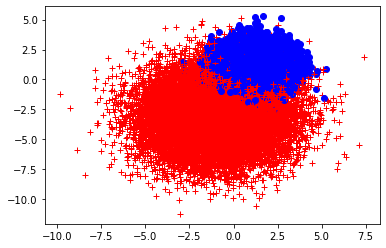

In [3]:
total = 0
plt.figure()
with open('dados1.csv') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        pXCp1 = -log(8*pi) - ((float(row[0])+1)**2 + (float(row[1])+3)**2)/8
        pXCm1 = -log(2*pi) - ((float(row[0])-1.2)**2 + (float(row[1])-1.2)**2)/2
        result = pXCm1 - pXCp1 + log(PCm1) - log(PCp1)
        if result > 0 and row[2] == '-1':
            success += 1
        elif result < 0 and row[2] == '1':
            success += 1
        total += 1
#         print(total)
        if row[2] == '-1':
            plt.plot(float(row[0]), float(row[1]), 'bo')
        else:
            plt.plot(float(row[0]), float(row[1]), 'r+')
plt.show()

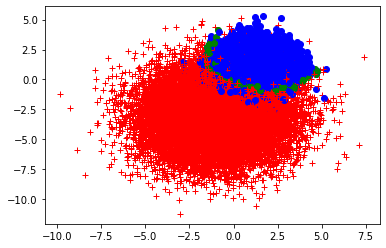

In [6]:
total = 0
plt.figure()
with open('dados1.csv') as csvfile:
    content = csv.reader(csvfile, delimiter=',')
    for row in content:
        if row[2] == '-1':
            plt.plot(float(row[0]), float(row[1]), 'bo')
        else:
            plt.plot(float(row[0]), float(row[1]), 'r+')
        
        pXCp1 = -log(8*pi) - ((float(row[0])+1)**2 + (float(row[1])+3)**2)/8
        pXCm1 = -log(2*pi) - ((float(row[0])-1.2)**2 + (float(row[1])-1.2)**2)/2
        result = pXCm1 - pXCp1 + log(PCm1) - log(PCp1)
        if result > 0 and row[2] == '-1':
            success += 1
        elif result < 0 and row[2] == '1':
            success += 1
        elif abs(result) < 0.8:
            plt.plot(float(row[0]), float(row[1]), 'go')
        total += 1
#         if total == 10000:
#             break
#         print(total)
plt.show()

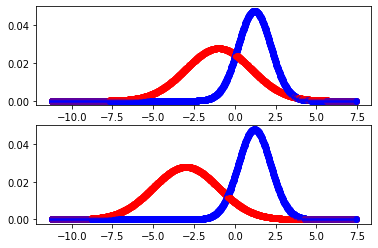

In [3]:
plt.figure('figura 2')
xmin = -11.234
xmax = 7.4222
step = abs(xmax - xmin)/1000
x1plot = plt.subplot(211)
x2plot = plt.subplot(212)
while xmin < xmax:
    x1 = xmin
    x2 = xmin
    px1Cp1 = 1/(8*pi)*exp(-((x1+1)**2)/8)*(PCp1)
    px2Cp1 = 1/(8*pi)*exp(-((x2+3)**2)/8)*(PCp1)
    px1Cm1 = 1/(2*pi)*exp(-((x1-1.2)**2)/2)*(PCm1)
    px2Cm1 = 1/(2*pi)*exp(-((x2-1.2)**2)/2)*(PCm1)
    
    x1plot.plot(xmin, px1Cp1, 'ro')
    x1plot.plot(xmin, px1Cm1, 'bo')
    
    x2plot.plot(xmin, px2Cp1, 'ro')
    x2plot.plot(xmin, px2Cm1, 'bo')
    xmin += step
plt.show()

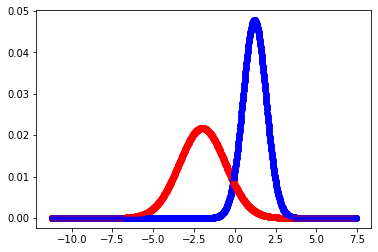

In [33]:
plt.figure('figura 3')
xmin = -11.234
xmax = 7.4222
step = abs(xmax - xmin)/1000

while xmin < xmax:
    x1 = xmin
    x2 = xmin
    pxCp1 = 1/(8*pi)*exp(-((x1+1)**2 + (x2+3)**2)/8)*(PCp1)
    pxCm1 = 1/(2*pi)*exp(-((x1-1.2)**2 + (x2-1.2)**2)/2)*(PCm1)
    
    plt.plot(xmin, pxCp1, 'ro')
    plt.plot(xmin, pxCm1, 'bo')
    
    xmin += step
plt.show()